Scroll to bottom to see eda conclusion and model implementation

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
plt.style.use('dark_background')
pd.set_option('display.max_columns', 200)

In [92]:
df = pd.read_csv(r"./insurance_data.csv")
df.drop(columns=['index','PatientID'],inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [93]:
df['children'].value_counts()

children
0    568
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [94]:
df.describe()

,age,bmi,bloodpressure,children,claim
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.086336,30.658333,94.189189,1.099850,13325.246426
std,11.112804,6.118967,11.445173,1.205958,12109.620712
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,29.000000,26.200000,86.000000,0.000000,4760.157500
50%,38.000000,30.350000,92.000000,1.000000,9412.965000
75%,47.000000,34.725000,99.000000,2.000000,16781.327500
max,60.000000,53.100000,140.000000,5.000000,63770.430000


In [95]:
df.corr(numeric_only=True)

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.042152,-0.060322,-0.026208,-0.028636
bmi,-0.042152,1.000000,0.144977,0.013719,0.199945
bloodpressure,-0.060322,0.144977,1.000000,-0.034356,0.531263
children,-0.026208,0.013719,-0.034356,1.000000,0.064149
claim,-0.028636,0.199945,0.531263,0.064149,1.000000


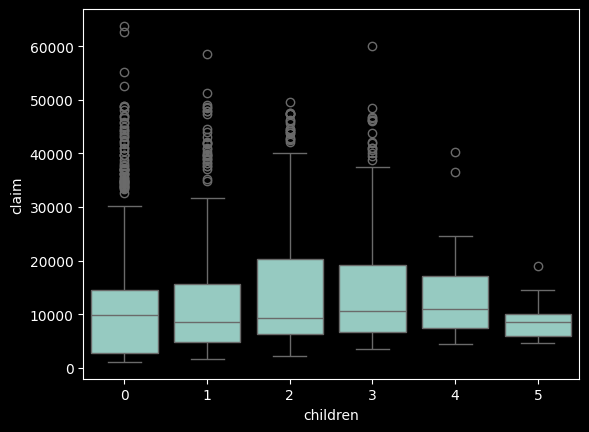

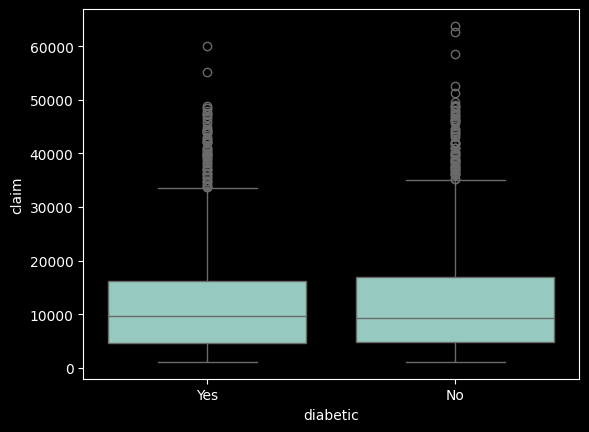

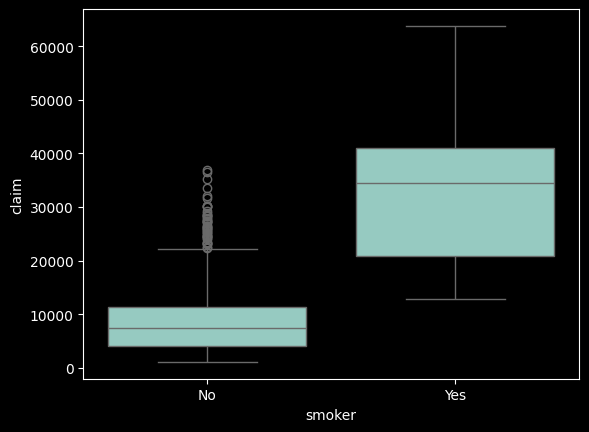

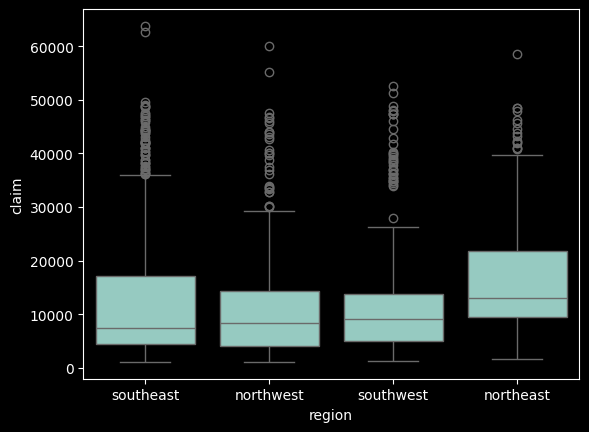

In [96]:
sns.boxplot(x='children',y='claim',data=df)
plt.show()
sns.boxplot(x='diabetic',y='claim',data=df)
plt.show()
sns.boxplot(x='smoker',y='claim',data=df)
plt.show()
sns.boxplot(x='region',y='claim',data=df)
plt.show()

<Axes: xlabel='bmi', ylabel='claim'>

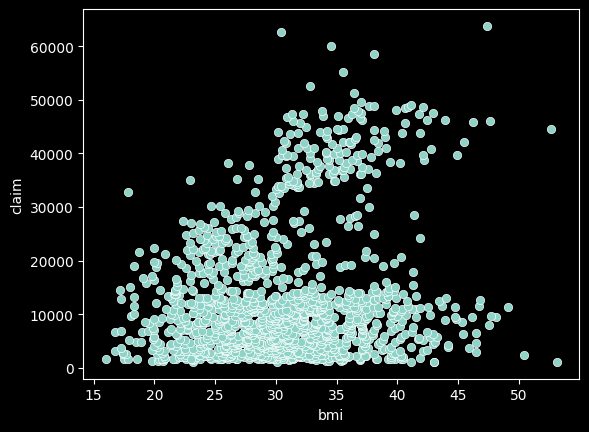

In [97]:
sns.scatterplot(x='bmi',y='claim',data=df)

<Axes: xlabel='bmi', ylabel='bloodpressure'>

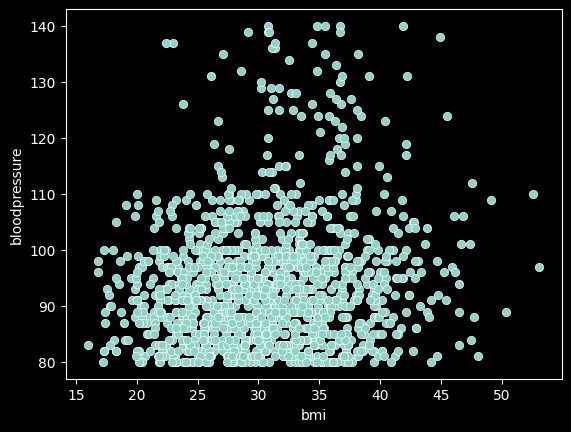

In [98]:
sns.scatterplot(x='bmi',y='bloodpressure',data=df)

In [99]:
def bptype(row):
    if(row<90):
        return 1
    elif(row>90 and row<120):
        return 2
    else:
        return 3
def bmitype(row):
    if(row<18.5):
        return 1
    elif(row>18.5 and row<30):
        return 2
    else:
        return 3
def agetype(row):
    if(row<40):
        return 1
    else:
        return 2
df['bmi_bin'] = df['bmi'].apply(bmitype)
df['bp_bin'] = df['bloodpressure'].apply(bptype)
df['age_bin'] = pd.cut(df['age'],bins=4,labels=[1,2,3,4])
df.pivot_table(index='bmi_bin', columns='region',aggfunc='size')

region,northeast,northwest,southeast,southwest
bmi_bin,,,,
1,8,7,2,3
2,116,184,170,139
3,107,154,270,172


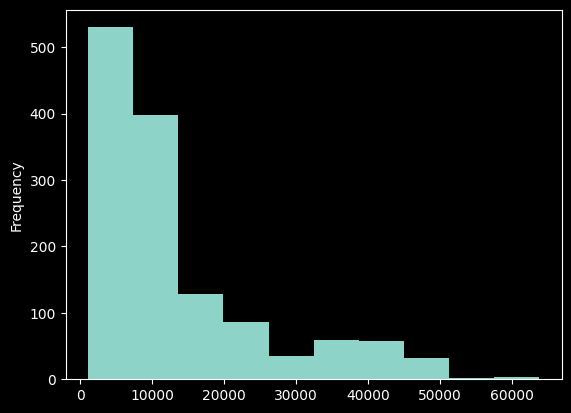

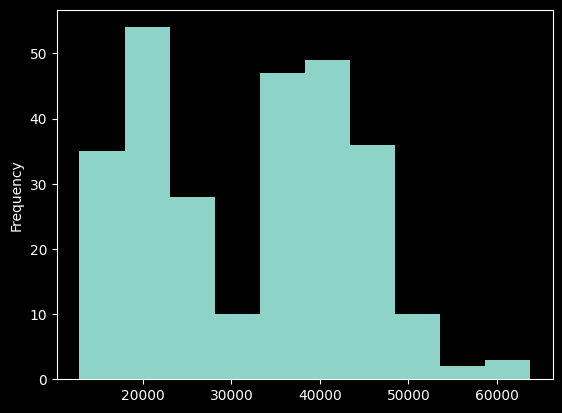

In [100]:
df['claim'].plot(kind='hist')
plt.show()
df[df['smoker']=='Yes']['claim'].plot(kind='hist')
plt.show()

In [101]:
pd.crosstab(df['region'],df['smoker'])

smoker,No,Yes
region,,
northeast,164,67
northwest,287,58
southeast,351,91
southwest,256,58


In [102]:
pd.crosstab(df['smoker'],df['diabetic'])

diabetic,No,Yes
smoker,,
No,557,501
Yes,138,136


In [103]:
pd.crosstab(df['diabetic'],df['bp_bin'])

bp_bin,1,2,3
diabetic,,,
No,259,376,60
Yes,263,325,49


In [104]:
pd.crosstab(df['bp_bin'],df['bmi_bin'])

bmi_bin,1,2,3
bp_bin,,,
1,10,261,251
2,8,317,376
3,2,31,76


In [105]:
pd.crosstab(df['bmi_bin'],df['age_bin'])

age_bin,1,2,3,4
bmi_bin,,,,
1,2,11,4,3
2,125,194,175,115
3,186,204,207,106


<Axes: xlabel='diabetic', ylabel='health_risk'>

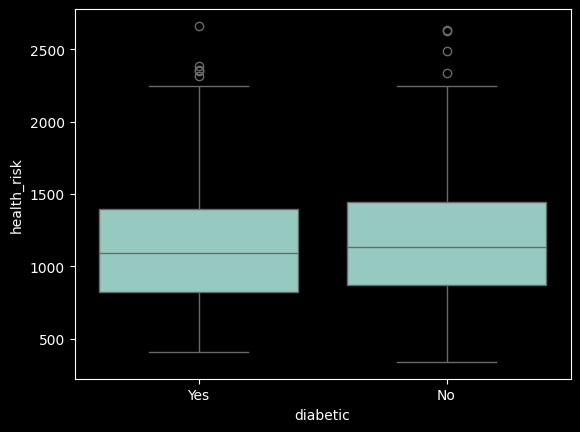

In [106]:
df['health_risk'] = df['age']*df['bmi']
sns.boxplot(y='health_risk',x='diabetic',data=df)

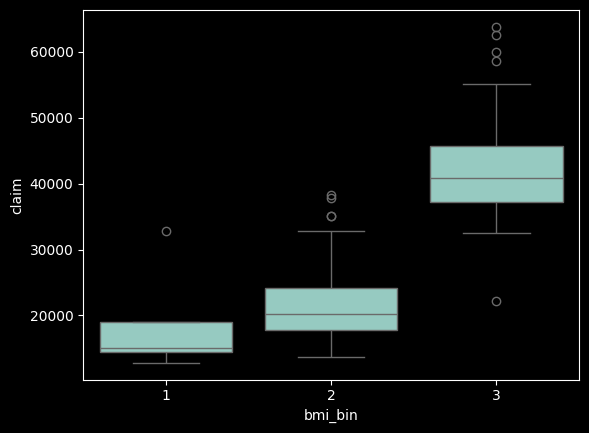

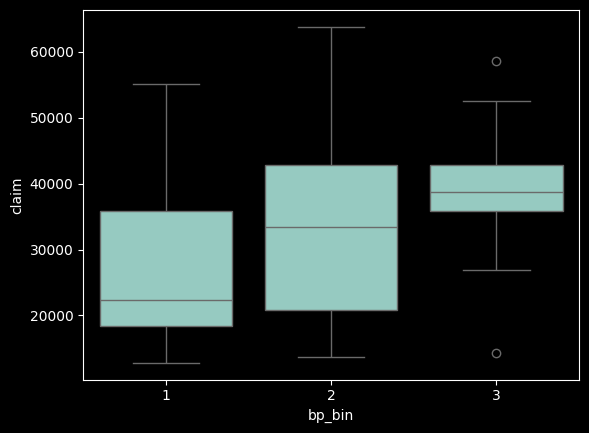

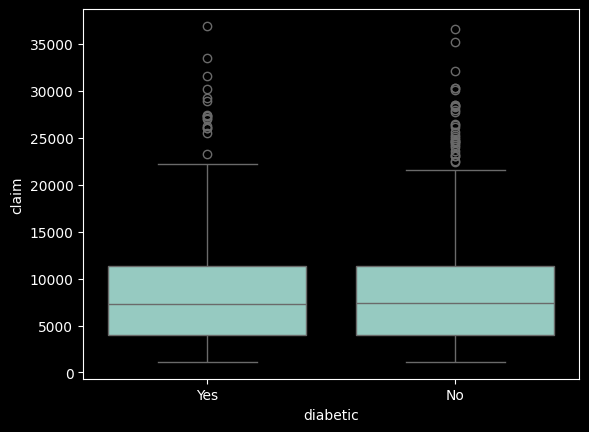

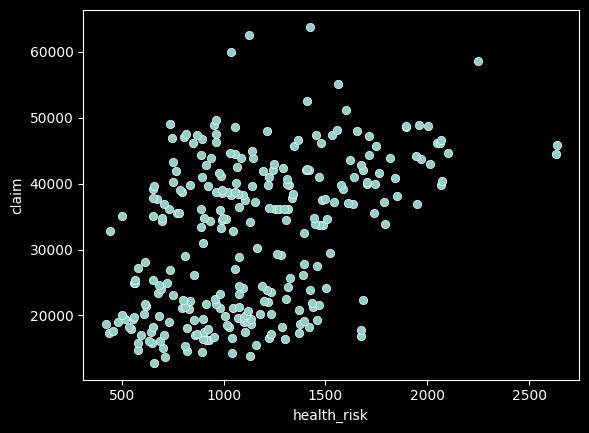

In [107]:
df_smokd = df[df['smoker']=='Yes']
sns.boxplot(y='claim',x='bmi_bin',data=df_smokd)
plt.show()
sns.boxplot(y='claim',x='bp_bin',data=df_smokd)
plt.show()
sns.boxplot(y='claim',x='diabetic',data=df[df['smoker']=='No'])
plt.show()
sns.scatterplot(y='claim',x='health_risk',data=df_smokd)
plt.show()


<Axes: xlabel='bp_bin', ylabel='age'>

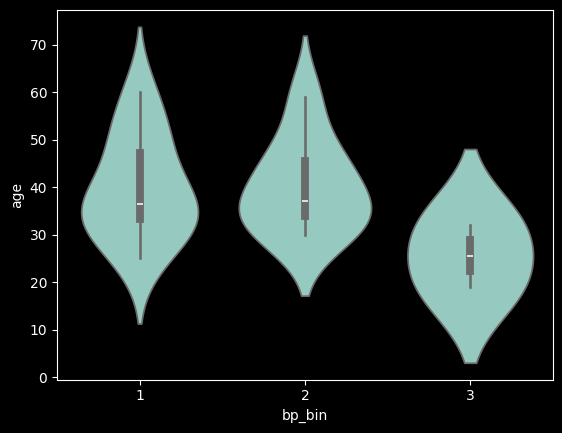

In [108]:
sns.violinplot(x='bp_bin',y='age',data=df[df['bmi_bin']==1])

In [109]:
df_45 = df[df['age']>45]
pd.crosstab(df_45['bmi_bin'],df_45['bp_bin'])

bp_bin,1,2,3
bmi_bin,,,
1,3,2,0
2,83,87,13
3,88,87,20


In [110]:
df_18 = df[df['age']<45]
pd.crosstab(df_18['bmi_bin'],df_18['bp_bin'])

bp_bin,1,2,3
bmi_bin,,,
1,7,5,2
2,169,217,18
3,156,281,54


children
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
Name: claim, dtype: object

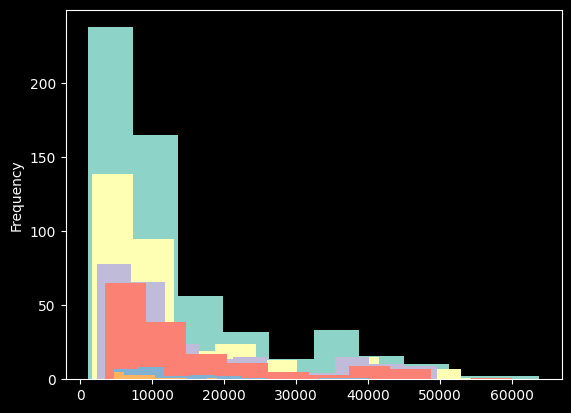

In [111]:
df.groupby('children')['claim'].plot(kind='hist')

<Axes: xlabel='children', ylabel='claim'>

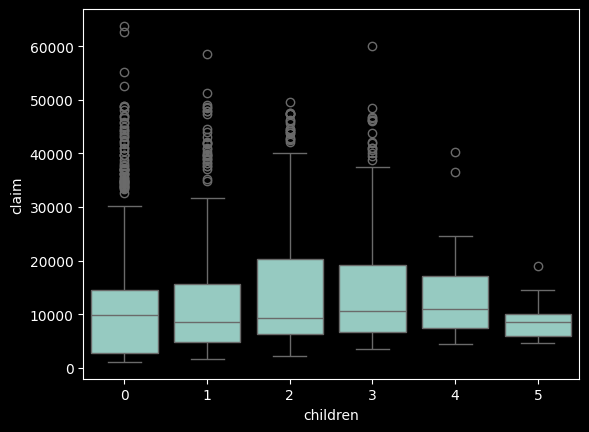

In [112]:
sns.boxplot(x=df['children'],y=df['claim'])

In [113]:
df.pivot_table(index='gender',columns='children',aggfunc='size')

children,0,1,2,3,4,5
gender,,,,,,
female,289,158,119,77,11,8
male,279,166,121,80,14,10


In [114]:
df.groupby('region')['claim'].mean()

region
northeast    16889.044719
northwest    11794.221855
southeast    13085.496833
southwest    12723.129841
Name: claim, dtype: float64

<Axes: xlabel='region', ylabel='claim'>

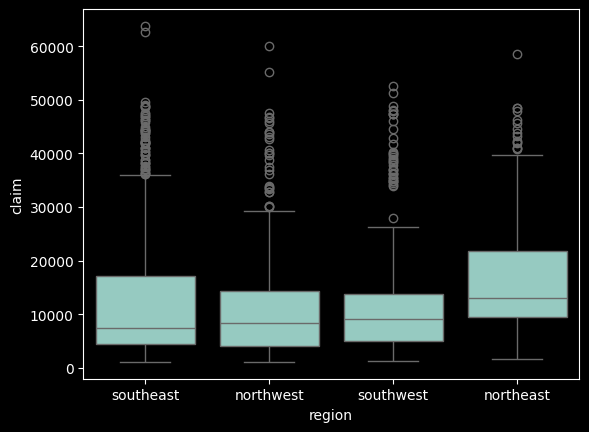

In [115]:
sns.boxplot(x=df['region'],y=df['claim'])

In [116]:
#df = pd.get_dummies(df, columns=['region'])
df['region']= df['region'].map({'southeast':1,'southwest':2,'northeast':3,'northwest':4})
df['gender'] = np.where(df['gender']=='male',1,0)
df['diabetic'] = np.where(df['diabetic']=='Yes',1,0)
df['smoker'] = np.where(df['smoker']=='Yes',1,0)
df['bloodpressure'] = np.log(df['bloodpressure'])
import category_encoders as ce
encoder = ce.TargetEncoder()
#df['smoker'] = encoder.fit_transform(X=df['smoker'],y=df['claim'])

In [117]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin,age_bin,health_risk
0,39.0,1,23.2,4.510860,1,0,0,1,1121.87,2,2,2,904.8
1,24.0,1,30.1,4.465908,0,0,0,1,1131.51,3,1,1,722.4
7,19.0,1,41.1,4.605170,0,0,0,4,1146.80,3,2,1,780.9
8,20.0,1,43.0,4.454347,0,0,0,4,1149.40,3,1,1,860.0
9,30.0,1,53.1,4.574711,0,0,0,4,1163.46,3,2,2,1593.0


# Conclusions
-gender and child don't have meaningful relationship with claim </br>
-most people have normal to high bmi, being diabetic doesn't matter with bmi</br>
-there is slight relationship that says high bmi and high age tends to have high claim , which is reasonable due to high health risk</br>
-males mostly smoke than females</br>
-smokers usually have high claims, plus smokers with high bmi tends to have much higher claims</br>
-adults below 45 age have high bp than 45+ age people </br>
-Most people with high bmi have low bp problems <br/>
<b>Major factor influencing claims: </br> Are you smoker? Do you have high bmi?</b>

In [118]:
x = df.drop(columns=['claim'])
y=df['claim']
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_percentage_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y1 = np.array(y)
x1 = np.array(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
y_train_s = scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_s = scaler.fit_transform(y_test.reshape(-1,1)).ravel()
lr = LinearRegression()
lr.fit(x_train_s,y_train_s)
y_pred = lr.predict(x_test_s)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).ravel()
#y_test = scaler.inverse_transform(y_test_s.reshape(-1,1)).ravel()
print("R2 score: ",r2_score(y_pred=y_pred,y_true=y_test))
print("100-MAPE: ",100-mean_absolute_percentage_error(y_pred,y_test))


R2 score:  0.7305536580616296
100-MAPE:  99.31215846830139


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfg = RandomForestRegressor(random_state=2,n_jobs=-1)
params = {
    'max_depth':[2,3,4,7,9,11],
    'n_estimators':[5,10,15,20],
    'oob_score':[True],
}
rfg = GridSearchCV(rfg,param_grid=params,n_jobs=-1)
rfg.fit(x_train,y_train)
y_pred = rfg.best_estimator_.predict(x_test)
print("Best params: ",rfg.best_params_)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"100-MAPE: {100-mean_absolute_percentage_error(y_test, y_pred)}")
print("OOB score: ",rfg.best_estimator_.oob_score_)
featureImps = rfg.best_estimator_.feature_importances_
featImps = [f"{value:.10f}" for value in featureImps]
print("feature Importance: ",)
cols = np.array(x.columns)
for (a,b) in zip(cols,featImps):
    print((a,b))


Best params:  {'max_depth': 4, 'n_estimators': 20, 'oob_score': True}
R2 Score: 0.8291543944737272
100-MAPE: 99.38162004746059
OOB score:  0.7948850335083769
feature Importance: 
('age', '0.0014342517')
('gender', '0.0000843617')
('bmi', '0.0884380091')
('bloodpressure', '0.0512317727')
('diabetic', '0.0000573603')
('children', '0.0051927026')
('smoker', '0.7477828168')
('region', '0.0023066718')
('bmi_bin', '0.0962870545')
('bp_bin', '0.0006625308')
('age_bin', '0.0000000000')
('health_risk', '0.0065224682')
